In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
S1Degrees = 6
S2Degrees = 6
NumStates = S1Degrees*S2Degrees
init = 10.0
Q = pd.DataFrame(index = np.arange(NumStates), columns = ['A0', 'A1', 'A2', 'A3'])


In [3]:
# Hyperparameters
alpha = 0.9
gamma = 0.5
DecayCst = 100 # 300

n_alpha = 10
alpha_vec = np.linspace(0.1,1,n_alpha)
alpha_vec = np.around(alpha_vec, 4)



eps_wind = 0



k_iter = 15
step = 1000

In [4]:

def Qinitialization(): # intiate the values of Q table
    for i in Q.index:
        for j in range(0, len(Q.columns)):
            Q.iloc[i, j] = 10.0
    return Q
def Reward(action, S1, S2):
    global eps_wind
    R = 0
    if S1 == 0 and S2 == 0:
        if action == 2:
            R = -1
    if S1 == 0 and S2 == 1:
        if action == 3:
            R = 1
            
    if (np.random.uniform() < eps_wind/2):
        R += 1
    elif (np.random.uniform() < eps_wind):
        R -= 1
    #endif
        

    return R


def Action(S):
    global S1, S2, epsilon, S1Degrees, S2Degrees
    ValMax = -np.inf
    Amax = -np.inf
    allowed = False
    allowedAction = [-1, -1, -1, -1]
    if S1 + 1 != S1Degrees:
        allowedAction[0] = 1
        val = Q.iloc[S, 0]
        if val > ValMax:
            ValMax = val
            Amax = 0
    if S1  != 0:
        allowedAction[1] = 1
        val = Q.iloc[S, 1]
        if val > ValMax:
            ValMax = val
            Amax = 1
    if S2 + 1 != S2Degrees:
        allowedAction[2] = 1
        val = Q.iloc[S, 2]
        if val > ValMax:
            ValMax = val
            Amax = 2
    if S2 != 0:
        allowedAction[3] = 1
        val = Q.iloc[S, 3]
        if val > ValMax:
            ValMax = val
            Amax = 3

    if (np.random.uniform() > epsilon):
        action = Amax
    else:
        while allowed == False:
            action = np.random.randint(0,4,1)[0]
            if allowedAction[action] == 1:
                allowed = True
    #endif
    return action


def CartState(action):
    global S1, S2
    if action == 0:
        S1 = S1 + 1
    if action == 1:
        S1 = S1 - 1
    if action == 2:
        S2 = S2 + 1
    if action == 3:
        S2 = S2 - 1
        
        
def Lookahead():
    global S1, S2, Sprime, S1Degrees
    MaxValue = -np.inf
    if S1 + 1 != S1Degrees:
        val = Q.iloc[Sprime, 0]
        if val > MaxValue:
            MaxValue = val
    if S1 != 0:
        val = Q.iloc[Sprime, 1]
        if val > MaxValue:
            MaxValue = val
    if S2 + 1 != S1Degrees:
        val = Q.iloc[Sprime, 2]
        if val > MaxValue:
            MaxValue = val
    if S2 != 0:
        val = Q.iloc[Sprime, 3]
        if val > MaxValue:
            MaxValue = val
    return MaxValue



In [5]:
ite =  k_iter*step #Num of Iterations

# K to keep the track of the sum of prize after each 1000 iteration for different values of alpha
K = np.zeros((k_iter, n_alpha))

col = []
for itmp in range(n_alpha):
    stmp = "alpha = " + str(alpha_vec[itmp])
    col.append(stmp)
#endfor

K = pd.DataFrame(columns = col, data = K)
T = pd.DataFrame(columns = ['SARSA', 'Q-Learning'], data = np.zeros((k_iter, 2))) # To compare the total prize after 1000 iteration for each model

In [6]:
S1 = 0
S2 = 0
S1_0 = S1
S2_0 = S2

s = S1Degrees*S1 + S2
Sprime = s


for j  in range(n_alpha):
    
    # reset Q
    Qinitialization()
    for t in range(1, ite):
        epsilon = math.exp(-float(t)/DecayCst)
        S1_0 = S1
        S2_0 = S2
        # determine which action to take
        Current_Action = Action(s)
        
        # update S1, S2
        CartState(Current_Action)
        
        # update Sprime
        #getSprime(Current_Action)
        Sprime = S1Degrees*S1 + S2
        
        # find the reward
        R = Reward(Current_Action, S1_0, S2_0)
        
        
        Look_Ahead_Value = Lookahead()
        TargetValue = R + gamma*Look_Ahead_Value
        
        Q.iloc[s, Current_Action] = Q.iloc[s, Current_Action] + alpha_vec[j]*(TargetValue - Q.iloc[s, Current_Action]) 
        s = Sprime
        
        if t > ite-2:
            print('at time %d, the cart was in the position (S1 = %d,S2 = %d), and now in (S1 = %d,S2 = %d), and the Reward = %d' % (t, S1_0, S2_0, S1, S2, R))

        for i in range(k_iter):
            if t > i * step and t <= (i+1)*step:
                K.iloc[i,j] += R
                if j == 3:
                    T.iloc[i, 1] += R

at time 14999, the cart was in the position (S1 = 1,S2 = 1), and now in (S1 = 0,S2 = 1), and the Reward = 0
at time 14999, the cart was in the position (S1 = 1,S2 = 0), and now in (S1 = 1,S2 = 1), and the Reward = 0
at time 14999, the cart was in the position (S1 = 1,S2 = 1), and now in (S1 = 0,S2 = 1), and the Reward = 0
at time 14999, the cart was in the position (S1 = 1,S2 = 0), and now in (S1 = 1,S2 = 1), and the Reward = 0


KeyboardInterrupt: 

    alpha = 0.1  alpha = 0.2  alpha = 0.3  alpha = 0.4  alpha = 0.5  \
0           1.0          2.0          3.0          3.0          4.0   
1           2.0          4.0         10.0         91.0        161.0   
2           3.0         12.0        174.0        250.0        250.0   
3           4.0        140.0        250.0        250.0        250.0   
4          10.0        250.0        250.0        250.0        250.0   
5          15.0        250.0        250.0        250.0        250.0   
6          34.0        250.0        250.0        250.0        250.0   
7         192.0        250.0        250.0        250.0        250.0   
8         250.0        250.0        250.0        250.0        250.0   
9         250.0        250.0        250.0        250.0        250.0   
10        250.0        250.0        250.0        250.0        250.0   
11        250.0        250.0        250.0        250.0        250.0   
12        250.0        250.0        250.0        250.0        250.0   
13    

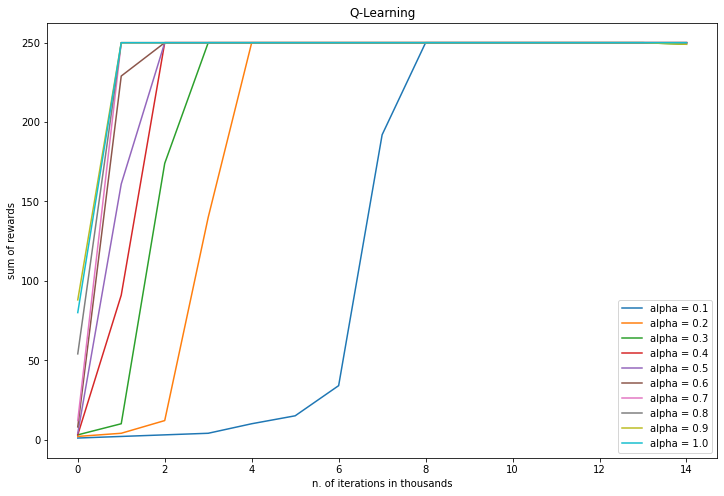

In [7]:
# Plot the Results
K.plot(figsize = (12, 8), title = 'Q-Learning', xlabel='n. of iterations in thousands', \
    ylabel = 'sum of rewards')

print(K)


In [8]:
ite =  k_iter*step #Num of Iterations

# K to keep the track of the sum of prize after each 1000 iteration for different values of alpha
K = np.zeros((k_iter, n_alpha))

col = []
for itmp in range(n_alpha):
    stmp = "alpha = " + str(alpha_vec[itmp])
    col.append(stmp)
#endfor

K = pd.DataFrame(columns = col, data = K)



Current_Action_Prime = Action(s)



for j in range(n_alpha):
    # reset Q
    Qinitialization()
    
    for t in range(1, ite):
        epsilon = math.exp(-float(t)/DecayCst)
        S1_0 = S1
        S2_0 = S2
        # determine which action to take
        Current_Action = Action(s)
        
        # update S1, S2
        CartState(Current_Action)
        
        # update Sprime
        #getSprime(Current_Action)
        Sprime = S1Degrees*S1 + S2
        
        # find the reward
        R = Reward(Current_Action, S1_0, S2_0)
        
        # determine 'best' action to take at Sprime
        Next_Action = Action(Sprime)
        

        R_prime = Reward(Current_Action_Prime, S1_0, S2_0)
        Q_Ahead_Value = Q.iloc[Sprime, Next_Action]
        target_Prime = R_prime + gamma*Q_Ahead_Value

        Q.iloc[s, Current_Action_Prime] = Q.iloc[s, Current_Action_Prime] + alpha_vec[j]*(target_Prime - Q.iloc[s, Current_Action_Prime])
        s = Sprime
        Current_Action_Prime = Next_Action
        
        if t > ite-2:
            print('at time %d, the cart was in the position (S1 = %d,S2 = %d), and now in (S1 = %d,S2 = %d), and the Reward = %d' % (t, S1_0, S2_0, S1, S2, R_prime))
        
        
        for i in range(k_iter):
            if t > i*step and t <= (i+1)*step:
                K.iloc[i,j] += R_prime
                if j == 3:
                    T.iloc[i, 0] += R_prime

at time 14999, the cart was in the position (S1 = 0,S2 = 0), and now in (S1 = 1,S2 = 0), and the Reward = 0
at time 14999, the cart was in the position (S1 = 1,S2 = 0), and now in (S1 = 1,S2 = 1), and the Reward = 0
at time 14999, the cart was in the position (S1 = 0,S2 = 0), and now in (S1 = 1,S2 = 0), and the Reward = 0
at time 14999, the cart was in the position (S1 = 1,S2 = 0), and now in (S1 = 1,S2 = 1), and the Reward = 0
at time 14999, the cart was in the position (S1 = 1,S2 = 1), and now in (S1 = 0,S2 = 1), and the Reward = 0
at time 14999, the cart was in the position (S1 = 1,S2 = 0), and now in (S1 = 1,S2 = 1), and the Reward = 0
at time 14999, the cart was in the position (S1 = 0,S2 = 0), and now in (S1 = 1,S2 = 0), and the Reward = 0
at time 14999, the cart was in the position (S1 = 1,S2 = 0), and now in (S1 = 1,S2 = 1), and the Reward = 0
at time 14999, the cart was in the position (S1 = 1,S2 = 1), and now in (S1 = 0,S2 = 1), and the Reward = 0
at time 14999, the cart was 

<AxesSubplot:>

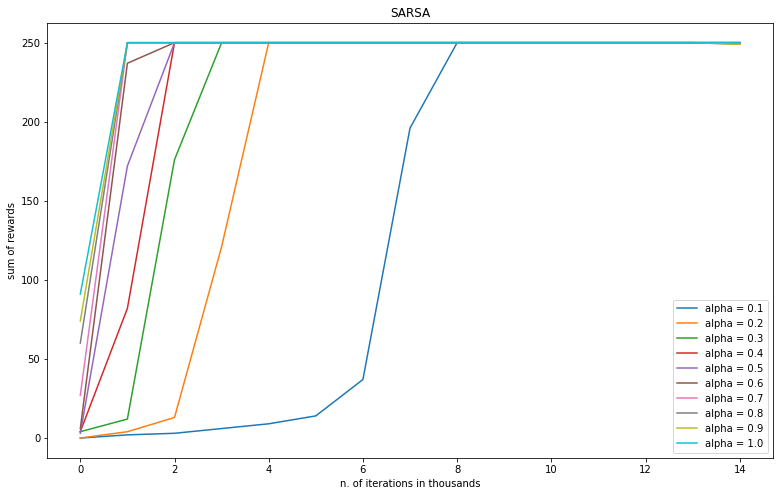

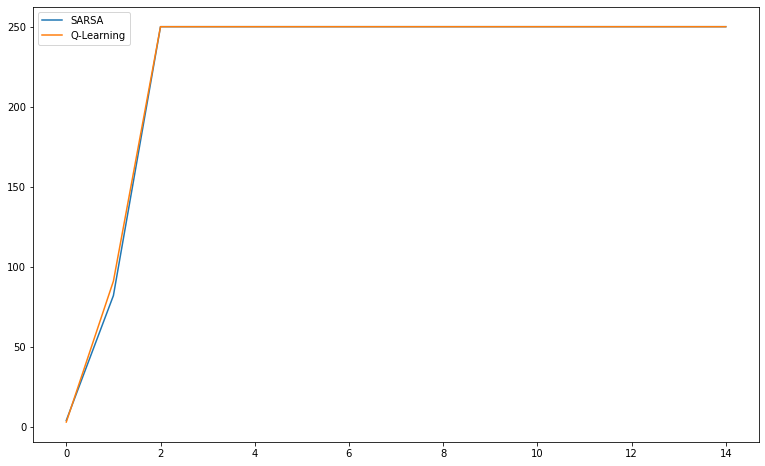

In [9]:
K.plot(figsize = (13,8), title = 'SARSA', xlabel='n. of iterations in thousands', \
    ylabel = 'sum of rewards')
T.plot(figsize = (13, 8))